.NET provides a ***basic set*** of concrete collection classes that `implement the interfaces`

#### List<T> and ArrayList

<div dir="rtl" style="width:90%; margin:auto; font-family:vazirmatn;">
<ul><li><strong>ArrayList</strong> یک کلاس غیرفراگیر است (غیرفراگیر یعنی نمی‌تواند نوع خاصی از اشیا را در خود ذخیره کند و باید از نوع <code>object</code> استفاده کند) که یک آرایه با اندازه‌ی پویا از اشیا فراهم می‌کند. این کلاس واسط <code>IList</code> را پیاده‌سازی می‌کند.</li><li><strong>List&lt;T&gt;</strong> یک کلاس فراگیر است که می‌تواند نوع خاصی از اشیا را در خود ذخیره کند. این کلاس واسط‌های <code>IList</code> و <code>IList&lt;T&gt;</code> و نسخه‌ی فقط خواندنی آن <code>IReadOnlyList&lt;T&gt;</code> را پیاده‌سازی می‌کند.</li></ul>

<p><strong>پیاده‌سازی واسط‌ها</strong>:</p>
<ul><li><code>ArrayList</code> فقط واسط <code>IList</code> را پیاده‌سازی می‌کند.</li><li><code>List&lt;T&gt;</code> واسط‌های <code>IList</code> و <code>IList&lt;T&gt;</code> و <code>IReadOnlyList&lt;T&gt;</code> را پیاده‌سازی می‌کند.</li></ul>

<h5>عملکرد داخلی</h5>
<ul><li>هر دو کلاس با استفاده از یک آرایه داخلی از اشیا کار می‌کنند که وقتی ظرفیت آن پر می‌شود، با یک آرایه بزرگتر جایگزین می‌شود.</li><li>افزودن عناصر به انتهای لیست معمولاً کارایی خوبی دارد زیرا معمولاً یک جای خالی در انتها وجود دارد.</li><li>افزودن عنصر به وسط یا ابتدای لیست کارایی کمتری دارد زیرا تمام عناصر بعد از نقطه افزودن باید جابه‌جا شوند تا فضای خالی ایجاد شود. حذف عناصر نیز به ویژه در نزدیکی ابتدا می‌تواند کند باشد.</li><li>جستجو در این لیست‌ها اگر از متد <code>BinarySearch</code> روی لیستی که قبلاً مرتب شده استفاده شود، کارآمد است. در غیر این صورت، جستجو ناکارآمد خواهد بود زیرا هر عنصر باید به صورت جداگانه بررسی شود.</li></ul>
</div>

In [7]:
var list = new List<int>(); //4*32

list.Add(1);

list.Add(1);

list.Add(1);
list.Add(1);
list.Add(1);
list.Add(1);
list.Add(1);list.Add(1);list.Add(1);

Console.WriteLine(list.Capacity);

list.TrimExcess();

Console.WriteLine(list.Capacity);

list.Add(1);

Console.WriteLine(list.Capacity);


16
9
18


In [ ]:
public class List<T> : IList<T>, IReadOnlyList<T>
{
public List ();
public List (IEnumerable<T> collection);
public List (int capacity);

// Add+Insert
public void Add (T item);
public void AddRange (IEnumerable<T> collection);
public void Insert (int index, T item);
public void InsertRange (int index, IEnumerable<T> collection);

// Remove
public bool Remove (T item);
public void RemoveAt (int index);
public void RemoveRange (int index, int count);
public int RemoveAll (Predicate<T> match);

// Indexing
public T this [int index] { get; set; }
public List<T> GetRange (int index, int count);
public Enumerator<T> GetEnumerator();

// Exporting, copying and converting:
public T[] ToArray();
public void CopyTo (T[] array);
public void CopyTo (T[] array, int arrayIndex);
public void CopyTo (int index, T[] array, int arrayIndex, int count);
public ReadOnlyCollection<T> AsReadOnly();
public List<TOutput> ConvertAll<TOutput> (Converter <T,TOutput>
converter);

// Other:
public void Reverse(); // Reverses order of elements in list.
public int Capacity { get;set; } // Forces expansion of internal array.
public void TrimExcess(); // Trims internal array back to size.
public void Clear(); // Removes all elements, so Count=0.
}

In [ ]:
var words = new List<string>(); // New string-typed list

words.Add ("melon");
words.Add ("avocado");
words.AddRange (new[] { "banana", "plum" } );
words.Insert (0, "lemon"); // Insert at start
words.InsertRange (0, new[] { "peach", "nashi" }); // Insert at start

words.Remove ("melon");
words.RemoveAt (3); // Remove the 4th element
words.RemoveRange (0, 2); // Remove first 2 elements

// Remove all strings starting in 'n':
words.RemoveAll (s => s.StartsWith ("n"));

Console.WriteLine (words [0]); // first word
Console.WriteLine (words [words.Count - 1]); // last word
foreach (string s in words) Console.WriteLine (s); // all words
List<string> subset = words.GetRange (1, 2); // 2nd->3rd words

string[] wordsArray = words.ToArray(); // Creates a new typed array

// Copy first two elements to the end of an existing array:
string[] existing = new string [1000];
words.CopyTo (0, existing, 998, 2);

List<string> upperCaseWords = words.ConvertAll (s => s.ToUpper());
List<int> lengths = words.ConvertAll (s => s.Length);

In [ ]:
ArrayList al = new ArrayList();
al.Add ("hello");
al.Add(1);
string first = (string) al [0];
string[] strArr = (string[]) al.ToArray (typeof (string));

//Such casts cannot be verified by the compiler; 
// the following compiles successfully but then fails at runtime
int first1 = (int) al [0]; // Runtime exception

In [ ]:
//If you import the System.Linq namespace, you can convert an ArrayList to a
//generic List by calling Cast and then ToList

ArrayList al = new ArrayList();
al.AddRange (new[] { 1, 5, 9 } );
List<int> list = al.Cast<int>().ToList();

//Cast and ToList are extension methods in the System.Linq.Enumerable class.

`List<T>` provides **instance versions** of all of `Array’s searching` and `sorting` methods.

In [ ]:
int[] array = { 3, 1, 4, 1, 5, 9 };
Array.Sort(array); // مرتب‌سازی آرایه
int indexInArray = Array.BinarySearch(array, 5); // جستجوی عنصر 5 در آرایه


List<int> list = new List<int> { 3, 1, 4, 1, 5, 9 };
list.Sort(); // مرتب‌سازی لیست
int indexInList = list.BinarySearch(5); // جستجوی عنصر 5 در لیست

<div dir="rtl" style="width:90%; margin:auto; font-family:vazirmatn;">
<ul><li><code>List&lt;T&gt;</code> در داخل خود یک آرایه خصوصی از نوع <code>T</code> دارد که به عنوان محل ذخیره‌سازی عناصر لیست عمل می‌کند.</li><li>وقتی ظرفیت آرایه داخلی پر می‌شود و نیاز به اضافه کردن عنصر جدیدی داریم، <code>List&lt;T&gt;</code> یک آرایه جدید با ظرفیت بزرگتر ایجاد می‌کند، عناصر موجود را به آرایه جدید کپی می‌کند و سپس عنصر جدید را اضافه می‌کند.</li><li>این عملیات در پشت صحنه و به صورت خودکار انجام می‌شود و نیازی به مدیریت دستی آن توسط برنامه‌نویس نیست.</li></ul>
</div>

### `LinkedList<T>`

`linked list` is a ***chain of nodes*** in which each references the `node before`, the `node after`, and the `actual element`.

Its **main benefit** is that an element can always be `inserted efficiently anywhere` in the list because it just involves **creating a new node** and ***updating a few references***.

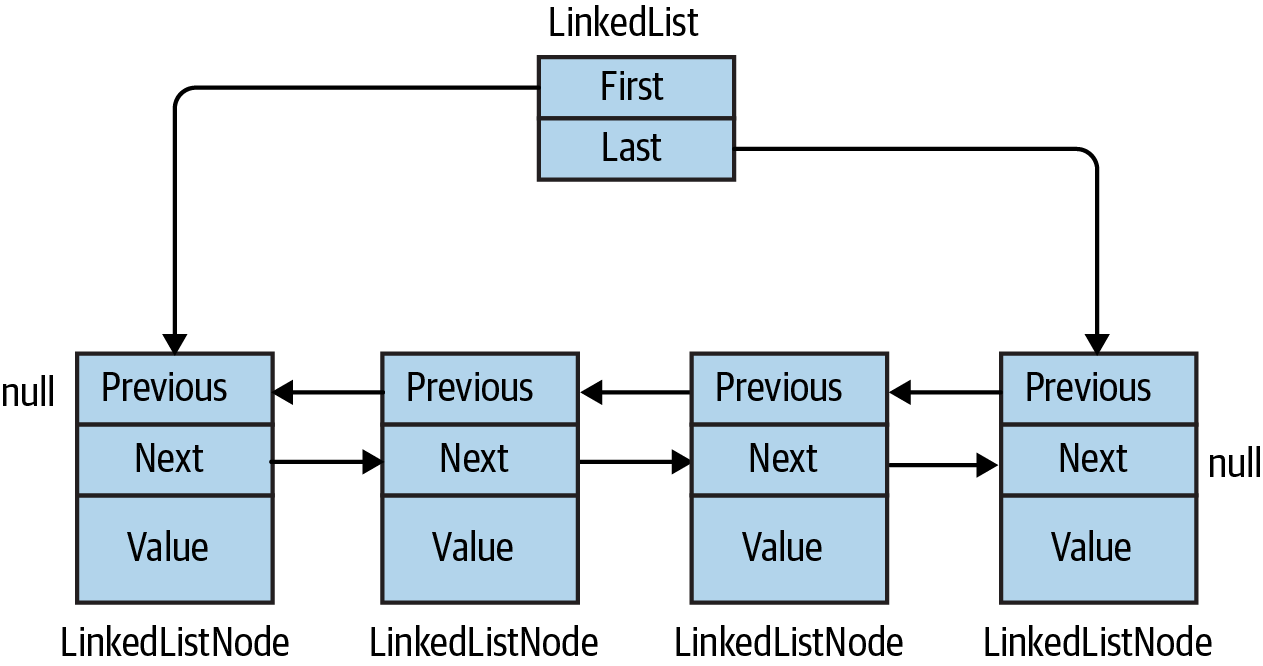

`LinkedList<T>` implements `IEnumerable<T>` and `ICollection<T>` (and their nongeneric versions), but `not IList<T>` because ***access by index is not supported***.

In [ ]:
//List nodes are implemented via the following class

public sealed class LinkedListNode<T>
{
public LinkedList<T> List { get; }
public LinkedListNode<T> Next { get; }
public LinkedListNode<T> Previous { get; }
public T Value { get; set; }
}

In [ ]:
public void AddFirst(LinkedListNode<T> node); // add to start
public LinkedListNode<T> AddFirst (T value); //first create node then add to start

public void AddLast (LinkedListNode<T> node);
public LinkedListNode<T> AddLast (T value);

public void AddAfter (LinkedListNode<T> node, LinkedListNode<T> newNode);
public LinkedListNode<T> AddAfter (LinkedListNode<T> node, T value);

public void AddBefore (LinkedListNode<T> node, LinkedListNode<T> newNode);
public LinkedListNode<T> AddBefore (LinkedListNode<T> node, T value);

In [ ]:
public void Clear();

public void RemoveFirst();
public void RemoveLast();

public bool Remove (T value);
public void Remove (LinkedListNode<T> node);

In [ ]:
// property to keep track of the number of elements in the list

public int Count { get; } // Fast
public LinkedListNode<T> First { get; } // Fast
public LinkedListNode<T> Last { get; } // Fast

In [ ]:
//searching methods

public bool Contains (T value);
public LinkedListNode<T> Find (T value);
public LinkedListNode<T> FindLast (T value);

In [ ]:
public void CopyTo (T[] array, int index);
public Enumerator<T> GetEnumerator();

In [ ]:
var tune = new LinkedList<string>();
tune.AddFirst ("do"); // do
tune.AddLast ("so"); // do - so

tune.AddAfter (tune.First, "re"); // do - re- so
tune.AddAfter (tune.First.Next, "mi"); // do - re - mi- so
tune.AddBefore (tune.Last, "fa"); // do - re - mi - fa- so

tune.RemoveFirst(); // re - mi - fa - so
tune.RemoveLast(); // re - mi - fa

LinkedListNode<string> miNode = tune.Find ("mi");
tune.Remove (miNode); // re - fa
tune.AddFirst (miNode); // mi- re - fa

foreach (string s in tune) Console.WriteLine (s);

### `Queue<T>` and `Queue`

`Queue<T>` and `Queue` are ***first-in***, ***first-out*** `(FIFO)` data structures  
  
`Enqueue` (add an item to the tail of the queue)  
  
`Dequeue` (retrieve and **remove** the item at the head of the queue)  
  
`Peek` return the element at the head of the queue ***without removing it***  
  
`Count` property useful in checking that ***elements are present before dequeuing***

they `do not implement IList<T>/IList`, because members ***cannot be accessed*** directly ***by index***.

In [ ]:
public class Queue<T> : IEnumerable<T>, ICollection, IEnumerable
{
public Queue();
public Queue (IEnumerable<T> collection); // Copies existing elements
public Queue (int capacity); // To lessen auto-resizing
public void Clear();
public bool Contains (T item);
public void CopyTo (T[] array, int arrayIndex);
public int Count { get; }
public T Dequeue();
public void Enqueue (T item);
public Enumerator<T> GetEnumerator(); // To support foreach
public T Peek();
public T[] ToArray();
public void TrimExcess();
}

In [ ]:
var q = new Queue<int>();
q.Enqueue (10);
q.Enqueue (20);
int[] data = q.ToArray(); // Exports to an array
Console.WriteLine (q.Count); // "2"
Console.WriteLine (q.Peek()); // "10"
Console.WriteLine (q.Dequeue()); // "10"
Console.WriteLine (q.Dequeue()); // "20"
Console.WriteLine (q.Dequeue()); // throws an exception (queue empty)

`Queues` are implemented internally using a`n array that’s resized as required`

### `Stack<T>` and `Stack`

`Stack<T>` and `Stack` are **last-in**, **first-out** (`LIFO`) data structures  
  
`Push` (add an item to the top of the stack)  
  
`Pop` (retrieve and ***remove*** an element from the top of the stack)  
  
`Peek` return the element at the top of the stack ***without removing it***  

In [ ]:
public class Stack<T> : IEnumerable<T>, ICollection, IEnumerable
{
public Stack();
public Stack (IEnumerable<T> collection); // Copies existing elements
public Stack (int capacity); // Lessens auto-resizing
public void Clear();
public bool Contains (T item);
public void CopyTo (T[] array, int arrayIndex);
public int Count { get; }
public Enumerator<T> GetEnumerator(); // To support foreach
public T Peek();
public T Pop();
public void Push (T item);
public T[] ToArray();
public void TrimExcess();
}

In [ ]:
var s = new Stack<int>();
s.Push (1); // Stack = 1
s.Push (2); // Stack = 1,2
s.Push (3); // Stack = 1,2,3
Console.WriteLine (s.Count); // Prints 3
Console.WriteLine (s.Peek()); // Prints 3, Stack = 1,2,3
Console.WriteLine (s.Pop()); // Prints 3, Stack = 1,2
Console.WriteLine (s.Pop()); // Prints 2, Stack = 1
Console.WriteLine (s.Pop()); // Prints 1, Stack = <empty>
Console.WriteLine (s.Pop()); // throws exception

`Stacks` are implemented internally with `an array that’s resized as required`

### BitArray

A ***BitArray*** is a ***dynamically sized collection*** of compacted `bool` values.

It is ***more memory efficient*** than both a simple **array of bool** and a generic **List of bool** because it uses `only one bit for each value`, whereas the bool type otherwise occupies `one byte for each value`.

There are four bitwise operator methods (`And`, `Or`, `Xor`, and `Not`). All but the last accept another BitArray

In [ ]:
var bits = new BitArray(2);
bits[1] = true;

bits.Xor (bits); // Bitwise exclusive-OR bits with itself
Console.WriteLine (bits[1]); // False

### `HashSet<T>` and `SortedSet<T>`

`HashSet<T> `and `SortedSet<T>` have the following distinguishing features:  
- Their ***Contains methods*** `execute quickly` using a **hash-based lookup**.  
  
- They `do not store duplicate` elements and silently `ignore` requests to ***add duplicates***.
- You `cannot access` an element **by position**.

`SortedSet<T>` ***keeps elements in order***, whereas HashSet<T> does not.

<div dir="rtl" style="width:90%; margin:auto; font-family:vazirmatn;">
<p><strong>ذخیره‌سازی (Storing Data)</strong>:</p>
<ul><li>هنگامی که داده‌ای را در یک مجموعه (set) مانند <code>HashSet&lt;T&gt;</code> یا <code>SortedSet&lt;T&gt;</code> اضافه می‌کنیم، ابتدا تابع هش بر روی داده اعمال می‌شود و مقدار هش محاسبه می‌شود.</li><li>سپس داده در موقعیت متناظر با این مقدار هش در جدول هش ذخیره می‌شود.</li></ul>

<p><strong>جستجو (Lookup)</strong>:</p>
<ul><li>برای پیدا کردن یک داده در مجموعه، مقدار هش داده مورد نظر محاسبه می‌شود و سپس به موقعیت متناظر در جدول هش مراجعه می‌شود تا داده بازیابی شود.</li></ul>

<div><p><strong>پیاده‌سازی <code>HashSet&lt;T&gt;</code></strong>:</p><ul><li><code>HashSet&lt;T&gt;</code> با استفاده از یک جدول هش (hashtable) پیاده‌سازی شده است. جدول هش یک ساختار داده‌ای است که تنها کلیدها (و نه مقادیر) را ذخیره می‌کند.</li><li>این ساختار داده‌ای برای عملیات جستجو، افزودن و حذف عناصر بسیار کارآمد است زیرا از توابع هش برای دسترسی سریع به داده‌ها استفاده می‌کند.</li></ul></div>
<div><p><strong>پیاده‌سازی <code>SortedSet&lt;T&gt;</code></strong>:</p><ul><li><code>SortedSet&lt;T&gt;</code> با استفاده از درخت قرمز-سیاه (red/black tree) پیاده‌سازی شده است. درخت قرمز-سیاه یک نوع خاص از درخت دودویی جستجو است که همیشه متوازن است.</li><li>این ساختار داده‌ای نه تنها عملیات جستجو، افزودن و حذف را انجام می‌دهد، بلکه عناصر را به صورت مرتب شده نگه می‌دارد، که به ویژه برای عملیات‌هایی که نیاز به مرتب‌سازی دارند مفید است.</li></ul></div>
</div>

Both collections implement `ICollection<T>`  
offer methods such as `Contains`, `Add`, and `Remove`.  
  
***predicate-based removal method*** called `RemoveWhere`.

In [2]:
var letters = new HashSet<char> ("the quick brown fox");

Console.WriteLine (letters.Contains ('t')); // true
Console.WriteLine (letters.Contains ('j')); // false

foreach (char c in letters) Console.Write (c); // the quickbrownfx **********

True
False
the quickbrownfx

In [ ]:
public void UnionWith (IEnumerable<T> other); // Adds
public void IntersectWith (IEnumerable<T> other); // Removes
public void ExceptWith (IEnumerable<T> other); // Removes
public void SymmetricExceptWith (IEnumerable<T> other); // Removes

`SymmetricExceptWith` removes all but the `elements that are unique` to **one set** or ***the other***

In [ ]:
var letters = new HashSet<char> ("the quick brown fox");
letters.SymmetricExceptWith ("the lazy brown fox");
foreach (char c in letters) Console.Write (c); // quicklazy

In [ ]:
public bool IsSubsetOf (IEnumerable<T> other);
//all member of this in other

public bool IsProperSubsetOf (IEnumerable<T> other);
//all member of this in other and other have another items

public bool IsSupersetOf (IEnumerable<T> other);
public bool IsProperSupersetOf (IEnumerable<T> other);

public bool Overlaps (IEnumerable<T> other);
//this and other have latest one common item

public bool SetEquals (IEnumerable<T> other);
//check this and other have exactly same items

`SortedSet<T>` ***offers all the members*** of `HashSet<T>`, plus the following:

In [ ]:
public virtual SortedSet<T> GetViewBetween (T lowerValue, T upperValue);
public IEnumerable<T> Reverse();
public T Min { get; }
public T Max { get; }

***SortedSet<T>*** also accepts an `optional IComparer<T>` in its constructor

In [ ]:
var letters = new SortedSet<char> ("the quick brown fox");
foreach (char c in letters) Console.Write (c); // bcefhiknoqrtuwx

foreach (char c in letters.GetViewBetween ('f', 'i'))
Console.Write (c); // fhi